# Exploratory Data Analysis

## Laura Gagnon-Vos
## 07/17/2024

This notebook contains exploratory data analysis for the dataset, Sleep Health and Lifestyle.

## Read in Dataset and View

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read in csv
df = pd.read_csv('Sleep_health_and_lifestyle_dataset_cleaned.csv', na_values=[' ','N/A','Null'], keep_default_na=False)
print(df.head())

#check for missing values
print(df.isnull().values.any())

#print(df['Sleep Disorder'].iloc[0])
#print(type(df['Sleep Disorder'].iloc[0]))


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8   Overweight   
4                 4                       30             8   Overweight   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  \
0         126/83          77         4200           None   
1         125/80          75    

In [2]:
#get info on data type and summary statistics
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Overall Exercise Level   374 non-null    object 
dtypes: float64(1), int64(7), o

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [3]:
df.sample(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Overall Exercise Level
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea,Medium
173,174,Male,41,Lawyer,7.7,8,90,5,Normal,130/85,70,8000,None,High
107,108,Male,37,Engineer,7.8,8,70,4,Normal,120/80,68,7000,None,High
225,226,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia,Medium
276,277,Male,49,Doctor,8.1,9,85,3,Overweight,139/91,86,3700,Sleep Apnea,High
199,200,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia,Medium
82,83,Male,35,Teacher,6.7,7,40,5,Overweight,128/84,70,5600,None,Medium
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High
122,123,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None,High
92,93,Male,35,Software Engineer,7.5,8,60,5,Normal,120/80,70,8000,None,High


In [4]:
#pd.set_option('display.max_columns', None)
#plt.rc('font', size=14)

# Plot the histogram for life expectancy
#plt.figure(figsize=(10, 6))
#plt.hist(df['Quality of Sleep'], bins=30, edgecolor='k', alpha=0.7)
#plt.xlabel("Quality of Sleep")
#plt.ylabel("Count")
#plt.title("Quality of Sleep")
#plt.show()

## Show Distributions with Histograms

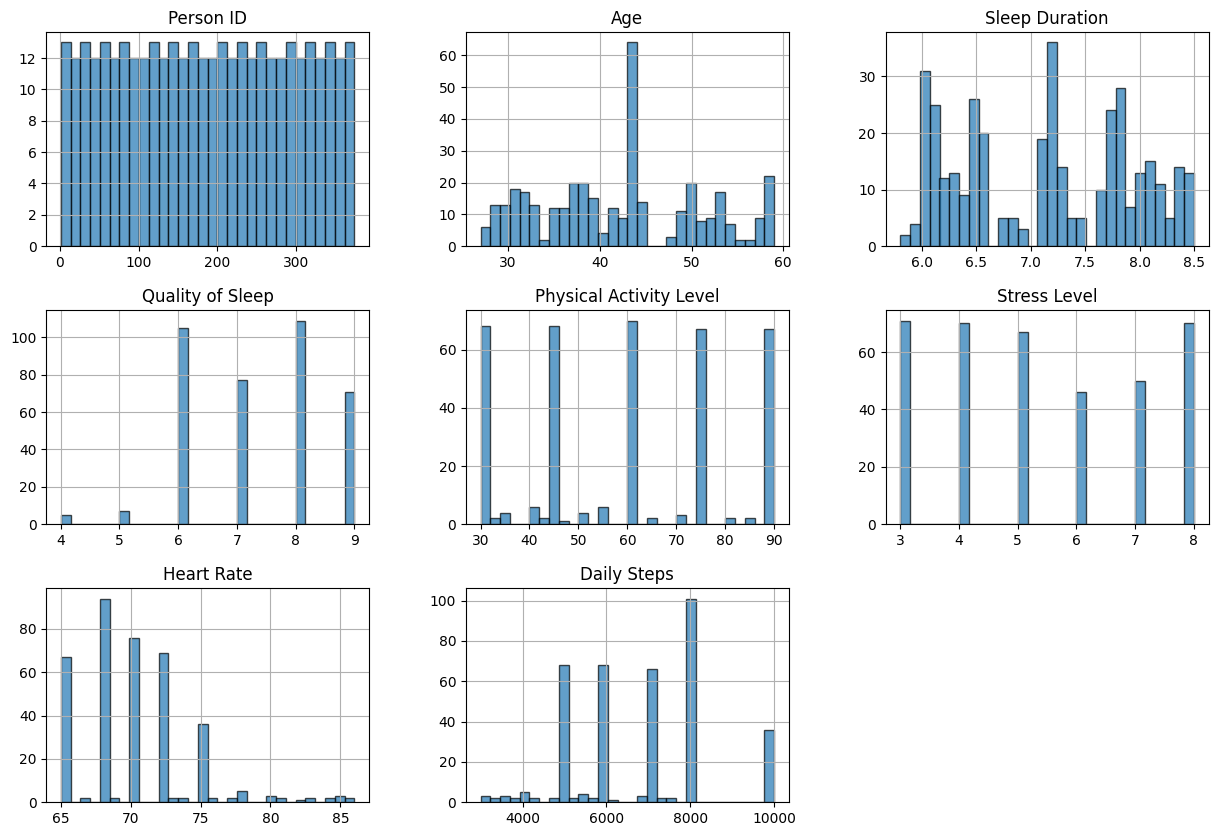

In [5]:
#plot histograms for attributes with numerical data

df.hist(figsize=(15, 10), bins=30, edgecolor='black',alpha=0.7)
#plt.tight_layout()
plt.show()


## Show Distributions for Categorical Data

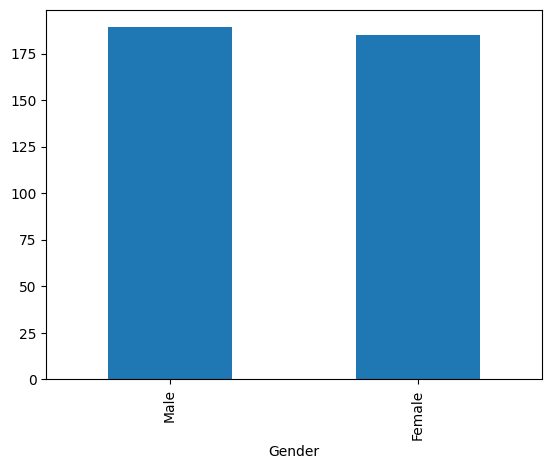

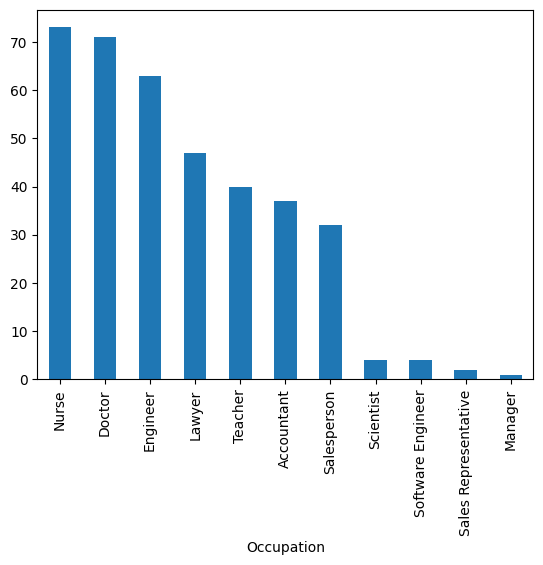

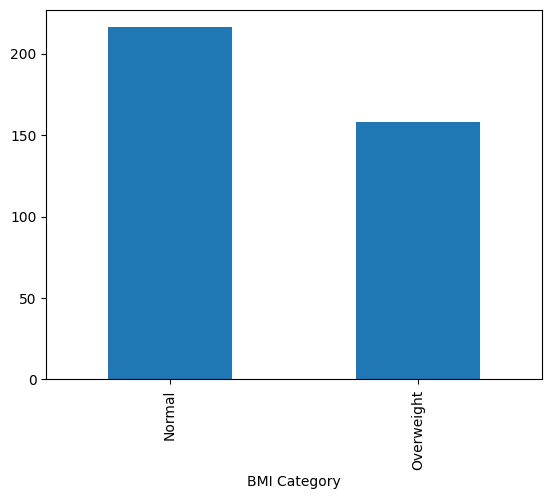

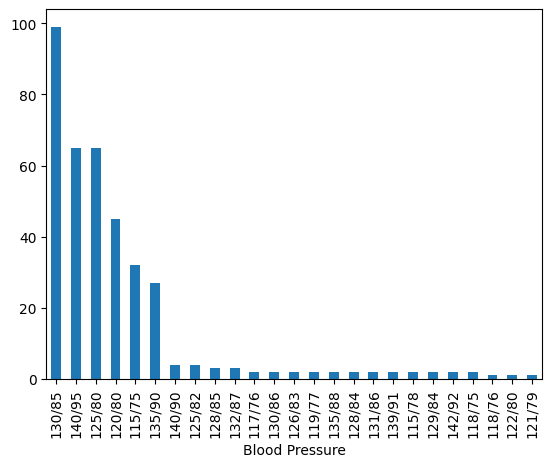

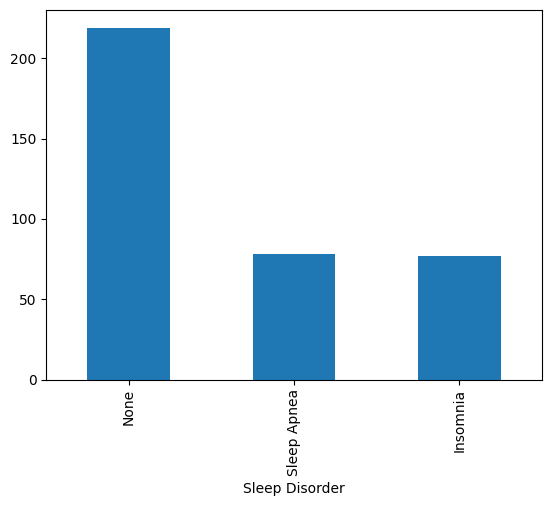

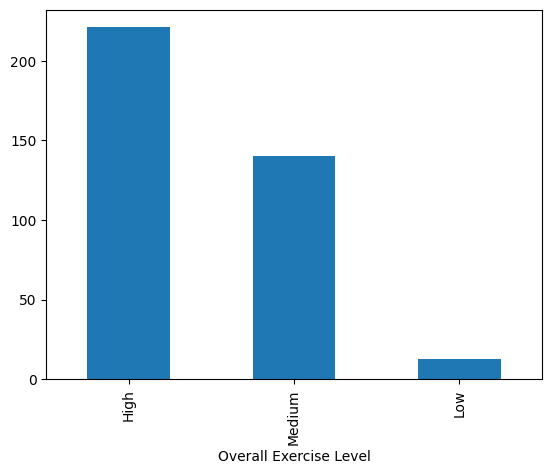

In [6]:
df['Gender'].value_counts().plot(kind='bar')
plt.show()
plt.tight_layout()
df['Occupation'].value_counts().plot(kind='bar')
plt.show()
df['BMI Category'].value_counts().plot(kind='bar')
plt.show()
df['Blood Pressure'].value_counts().plot(kind='bar')
plt.show()
df['Sleep Disorder'].value_counts().plot(kind='bar')
plt.show()
df['Overall Exercise Level'].value_counts().plot(kind='bar')
plt.show()


## Correlation Analysis

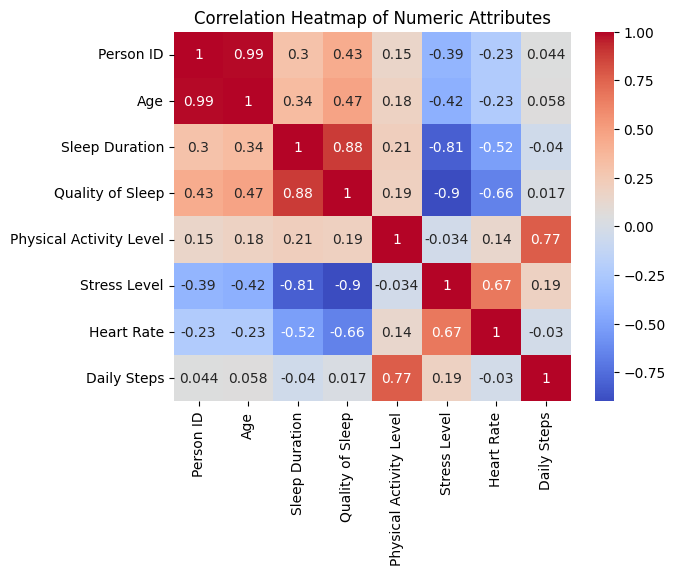

In [7]:
# make a dataframe for numeric attributes
num_df=  df.select_dtypes(include = ['int64','float'])

# make correlation matrix heatmap
plt.figure
correlation=num_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Attributes')
plt.show()

In [8]:
df.groupby('Sleep Disorder', as_index=False)['Quality of Sleep'].mean()

,Sleep Disorder,Quality of Sleep
0,Insomnia,6.532468
1,None,7.625571
2,Sleep Apnea,7.205128


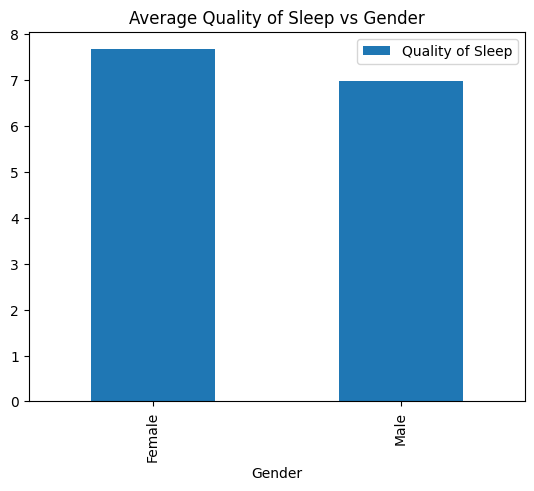

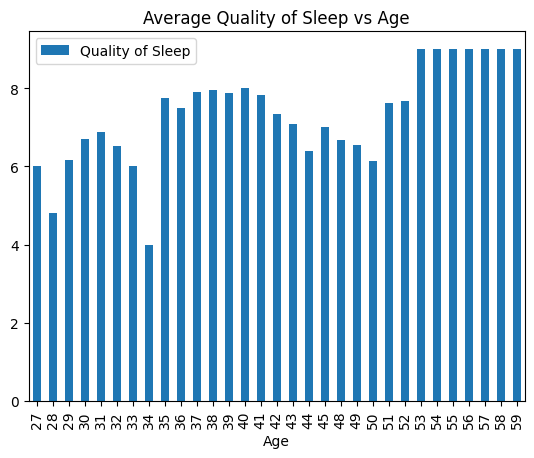

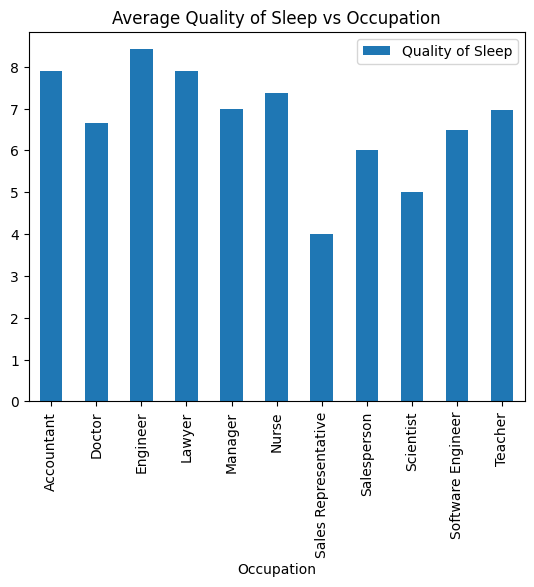

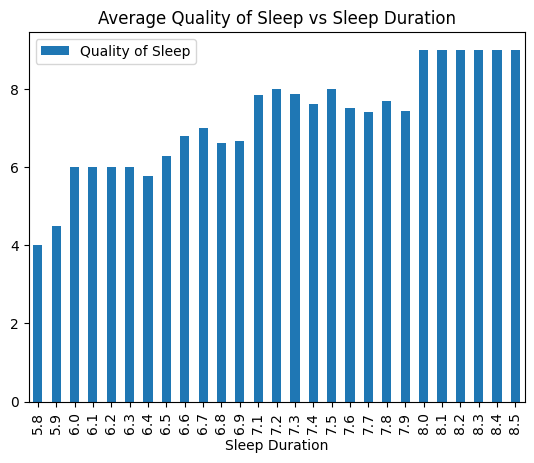

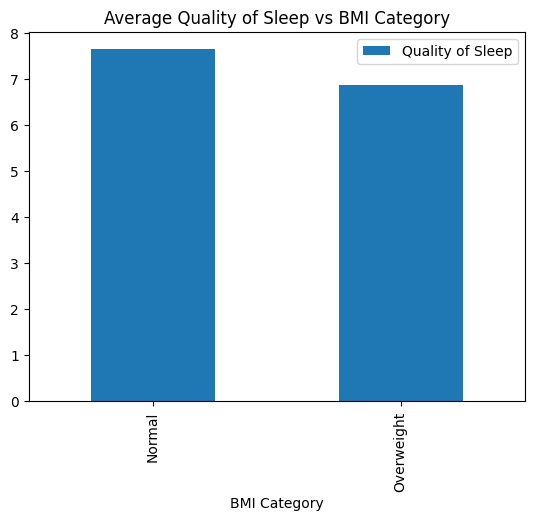

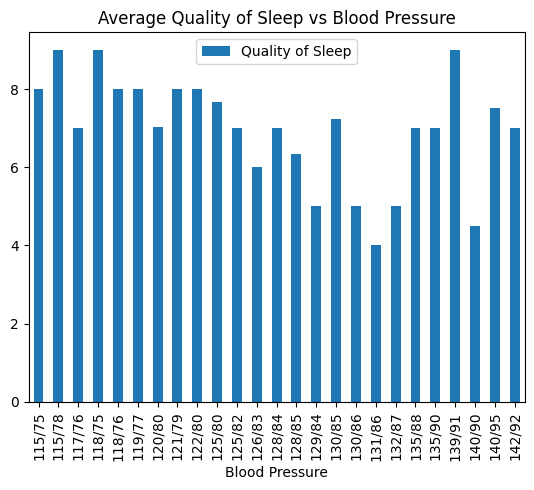

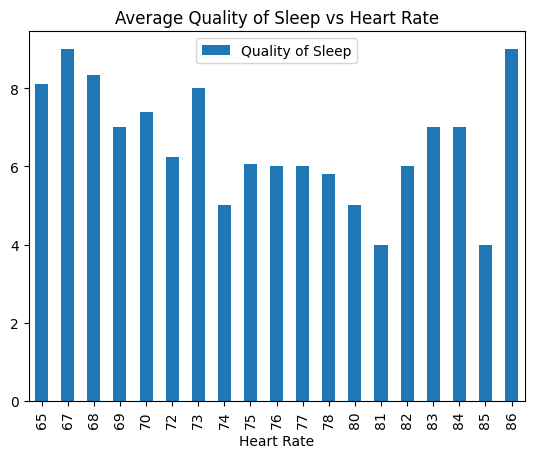

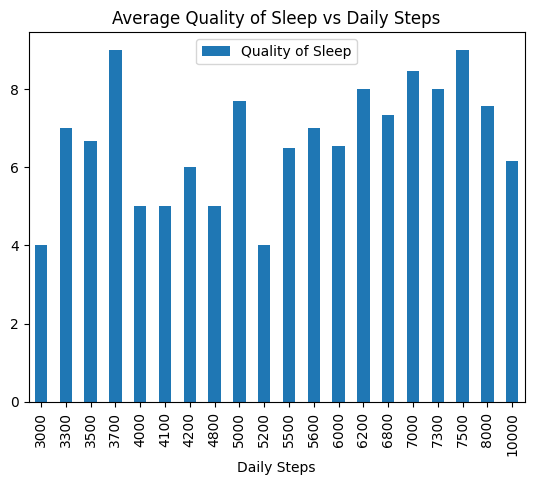

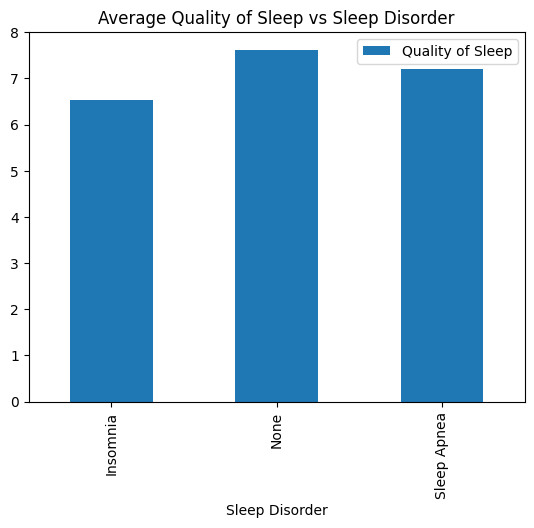

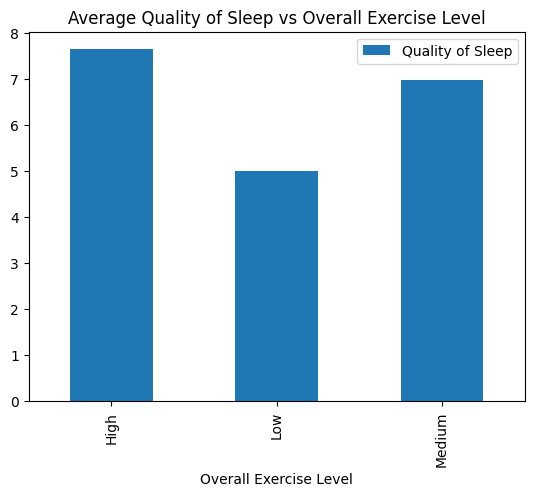

In [9]:
#df.groupby('Sleep Disorder', as_index=False)['Quality of Sleep'].mean().plot.bar(x='Sleep Disorder',title='Average Quality of Sleep')
df.groupby('Gender', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Gender', y='Quality of Sleep', title='Average Quality of Sleep vs Gender')
plt.show()
df.groupby('Age', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Age', y='Quality of Sleep', title='Average Quality of Sleep vs Age')
plt.show()
df.groupby('Occupation', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Occupation', y='Quality of Sleep', title='Average Quality of Sleep vs Occupation')
plt.show()
df.groupby('Sleep Duration', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Sleep Duration', y='Quality of Sleep', title='Average Quality of Sleep vs Sleep Duration')
plt.show()
df.groupby('BMI Category', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='BMI Category', y='Quality of Sleep', title='Average Quality of Sleep vs BMI Category')
plt.show()
df.groupby('Blood Pressure', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Blood Pressure', y='Quality of Sleep', title='Average Quality of Sleep vs Blood Pressure')
plt.show()
df.groupby('Heart Rate', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Heart Rate', y='Quality of Sleep', title='Average Quality of Sleep vs Heart Rate')
plt.show()
df.groupby('Daily Steps', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Daily Steps', y='Quality of Sleep', title='Average Quality of Sleep vs Daily Steps')
plt.show()
df.groupby('Sleep Disorder', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Sleep Disorder', y='Quality of Sleep', title='Average Quality of Sleep vs Sleep Disorder')
plt.show()
df.groupby('Overall Exercise Level', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Overall Exercise Level', y='Quality of Sleep', title='Average Quality of Sleep vs Overall Exercise Level')
plt.show()

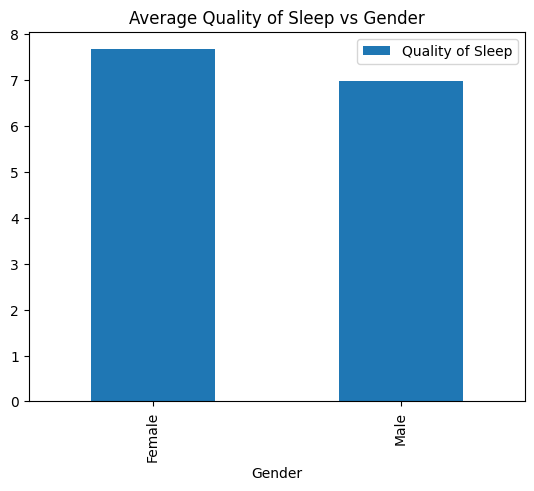

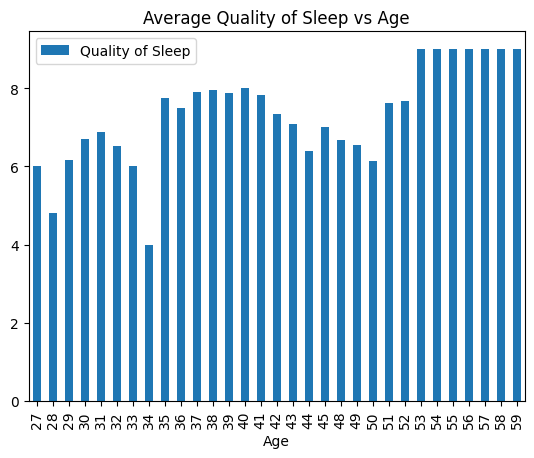

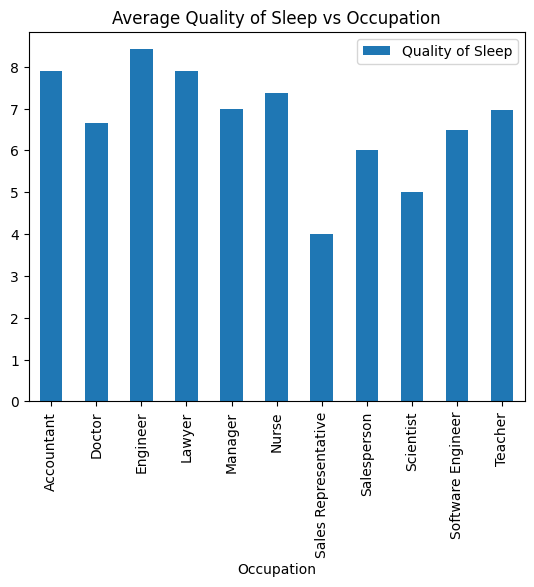

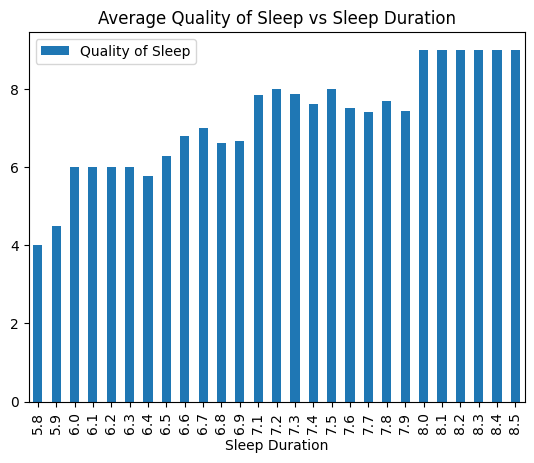

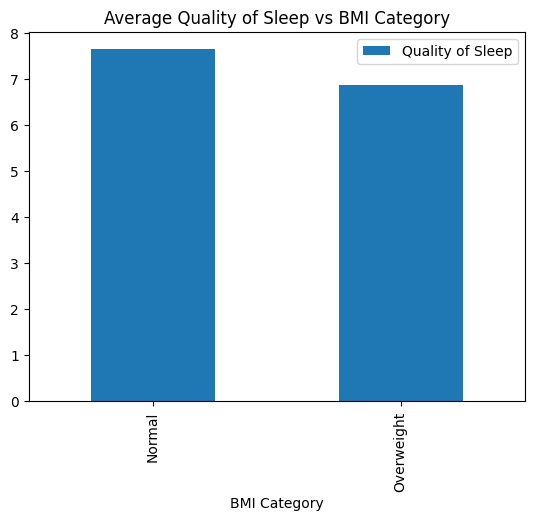

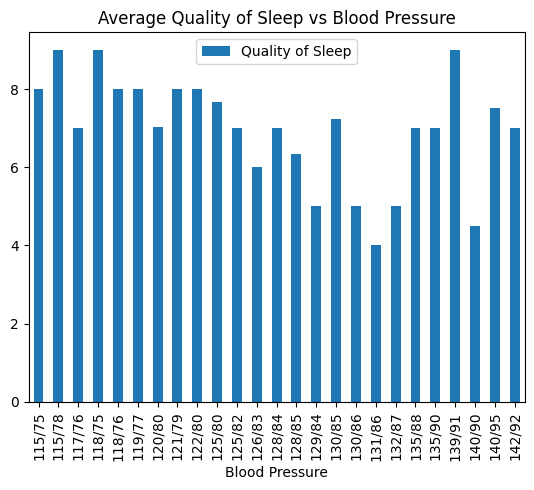

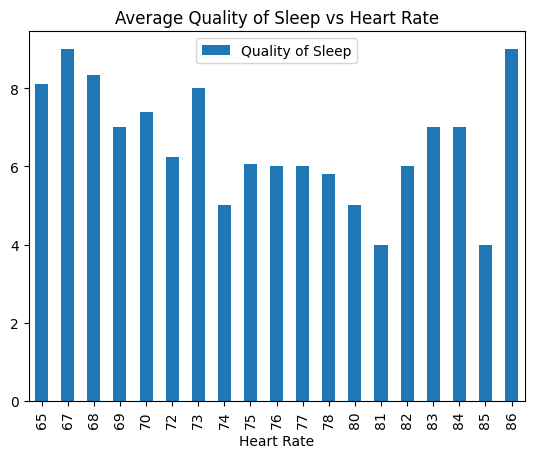

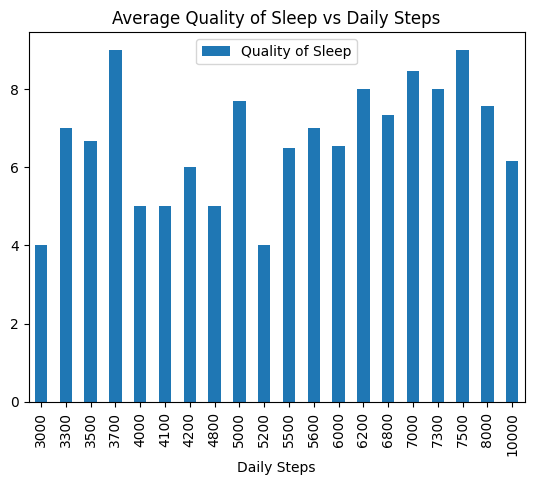

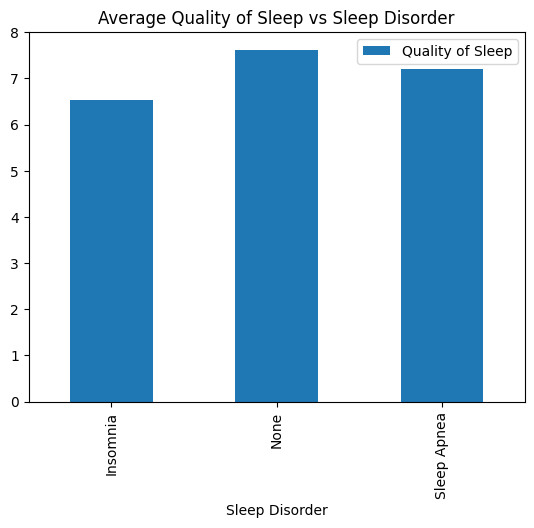

<Axes: title={'center': 'Average Quality of Sleep vs Overall Exercise Level'}, xlabel='Overall Exercise Level'>

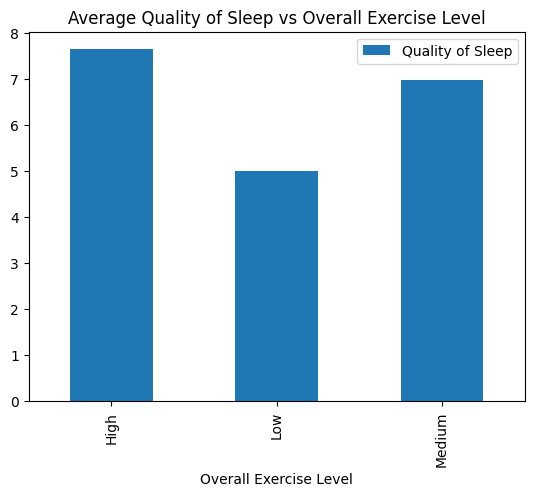

In [10]:
#df.groupby('Sleep Disorder', as_index=False)['Quality of Sleep'].mean().plot.bar(x='Sleep Disorder',title='Average Quality of Sleep')
df.groupby('Gender', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Gender', y='Quality of Sleep', title='Average Quality of Sleep vs Gender')
plt.show()
df.groupby('Age', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Age', y='Quality of Sleep', title='Average Quality of Sleep vs Age')
plt.show()
df.groupby('Occupation', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Occupation', y='Quality of Sleep', title='Average Quality of Sleep vs Occupation')
plt.show()
df.groupby('Sleep Duration', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Sleep Duration', y='Quality of Sleep', title='Average Quality of Sleep vs Sleep Duration')
plt.show()
df.groupby('BMI Category', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='BMI Category', y='Quality of Sleep', title='Average Quality of Sleep vs BMI Category')
plt.show()
df.groupby('Blood Pressure', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Blood Pressure', y='Quality of Sleep', title='Average Quality of Sleep vs Blood Pressure')
plt.show()
df.groupby('Heart Rate', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Heart Rate', y='Quality of Sleep', title='Average Quality of Sleep vs Heart Rate')
plt.show()
df.groupby('Daily Steps', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Daily Steps', y='Quality of Sleep', title='Average Quality of Sleep vs Daily Steps')
plt.show()
df.groupby('Sleep Disorder', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Sleep Disorder', y='Quality of Sleep', title='Average Quality of Sleep vs Sleep Disorder')
plt.show()
df.groupby('Overall Exercise Level', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Overall Exercise Level', y='Quality of Sleep', title='Average Quality of Sleep vs Overall Exercise Level')

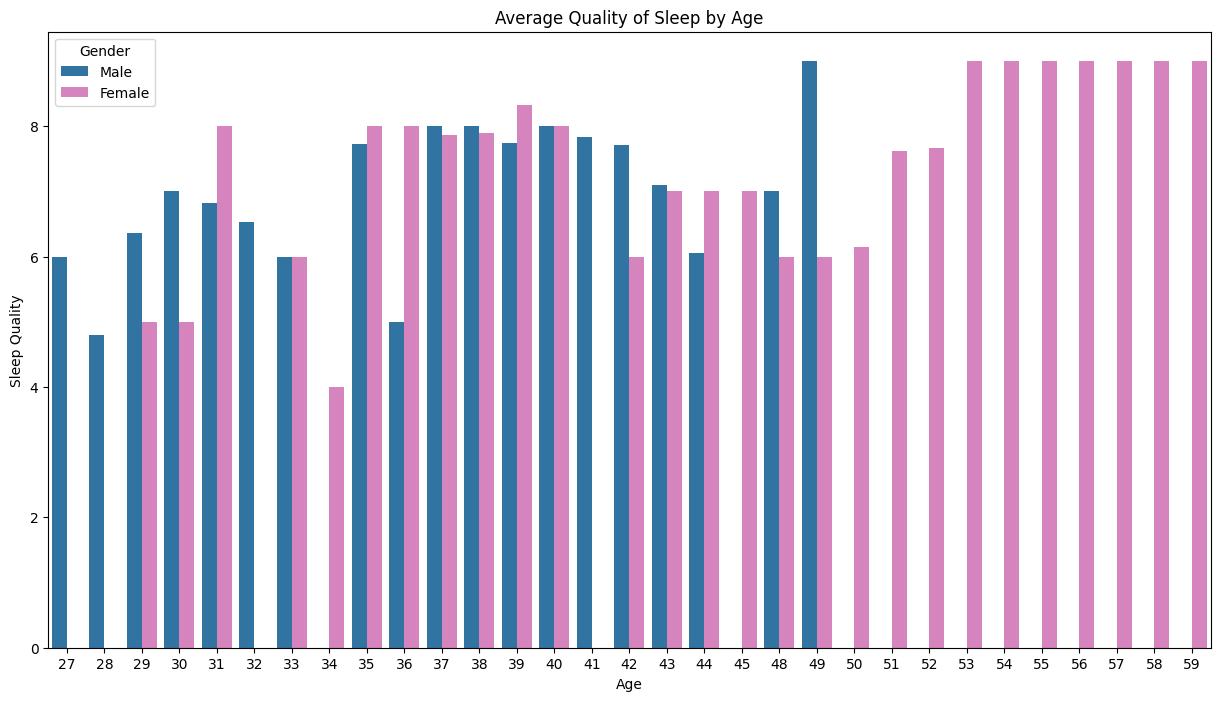

In [11]:
#df.groupby(['Gender']['Age'], as_index=True)['Quality of Sleep'].mean().plot(kind='bar',x='Age', y='Quality of Sleep', title='Female: Average Quality of Sleep',color='indianred')


# perform groupby 
df_test = df.groupby(['Age', 'Gender']).agg(mean_sleep_quality=("Quality of Sleep", 'mean')) 
df_test = df_test.reset_index() 

plt.figure(figsize=(15,8))
# plot barplot 
chart = sns.barplot(x="Age", 
		y="mean_sleep_quality", 
		hue="Gender", 
		data=df_test,
        palette=["C0", "C6"])

chart.set_title('Average Quality of Sleep by Age')
chart.set_ylabel('Sleep Quality')

plt.show()

#print(femalefilter_df)
#malefilter_df = df[df['Gender'] == 'Male']
#print(femalefilter_df)
#femalefilter_df.groupby(['Age'], as_index=True)['Quality of Sleep'].mean().plot(kind='bar',x='Age', y='Quality of Sleep', title='Female: Average Quality of Sleep',color='indianred')

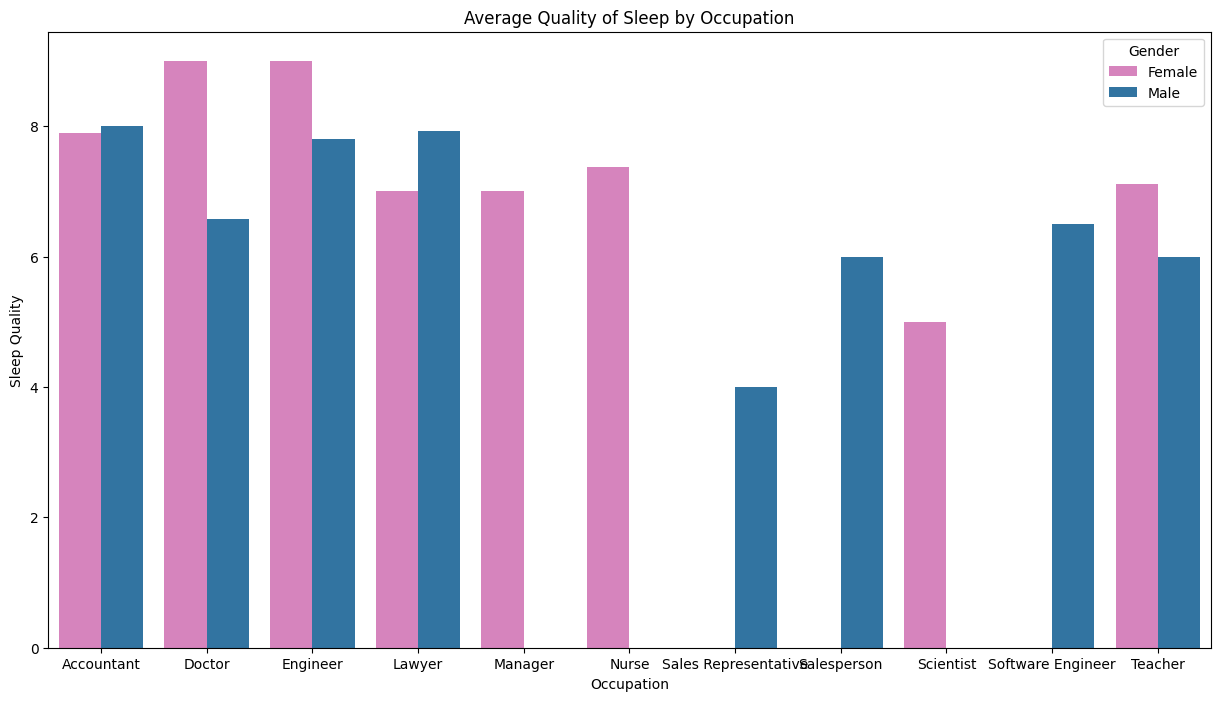

In [12]:
# perform groupby 
df_test = df.groupby(['Occupation', 'Gender']).agg(mean_sleep_quality=("Quality of Sleep", 'mean')) 
df_test = df_test.reset_index() 

plt.figure(figsize=(15,8))
# plot barplot 
chart = sns.barplot(x="Occupation", 
		y="mean_sleep_quality", 
		hue="Gender", 
		data=df_test,
        palette=["C6", "C0"])

chart.set_title('Average Quality of Sleep by Occupation')
chart.set_ylabel('Sleep Quality')

plt.show()

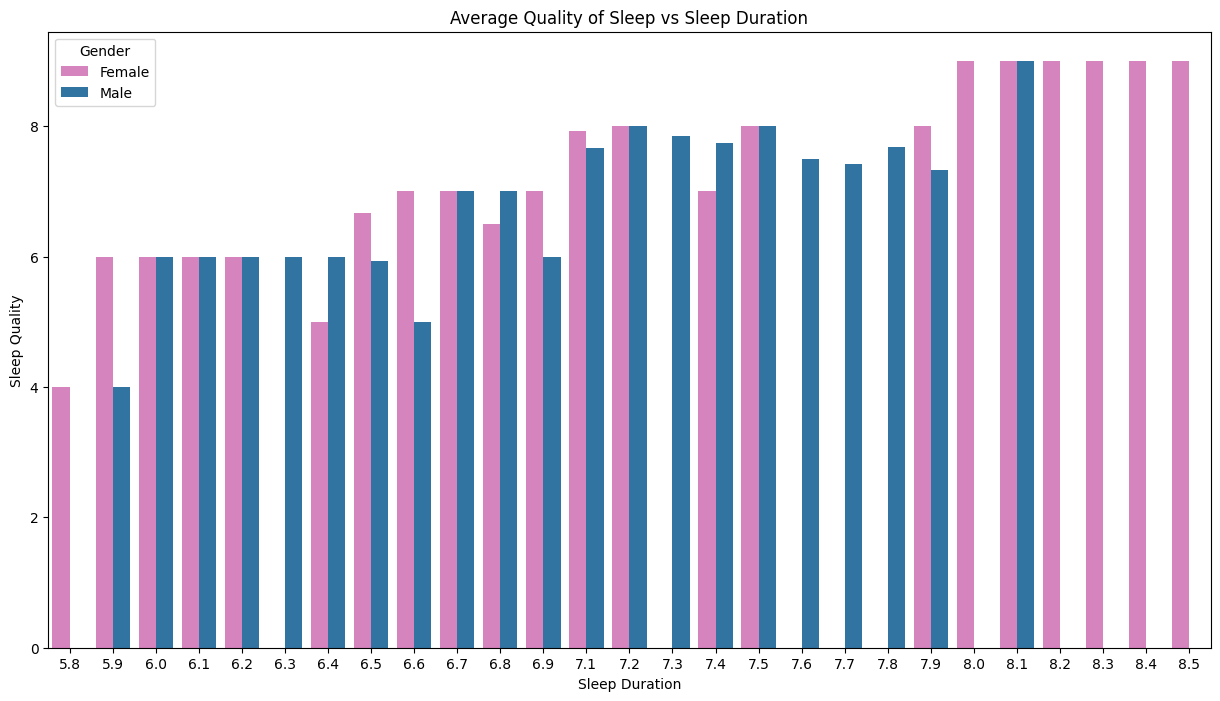

In [13]:
# perform groupby 
df_test = df.groupby(['Sleep Duration', 'Gender']).agg(mean_sleep_quality=("Quality of Sleep", 'mean')) 
df_test = df_test.reset_index() 

plt.figure(figsize=(15,8))
# plot barplot 
chart = sns.barplot(x="Sleep Duration", 
		y="mean_sleep_quality", 
		hue="Gender", 
		data=df_test,
        palette=["C6", "C0"])

chart.set_title('Average Quality of Sleep vs Sleep Duration')
chart.set_ylabel('Sleep Quality')

plt.show()

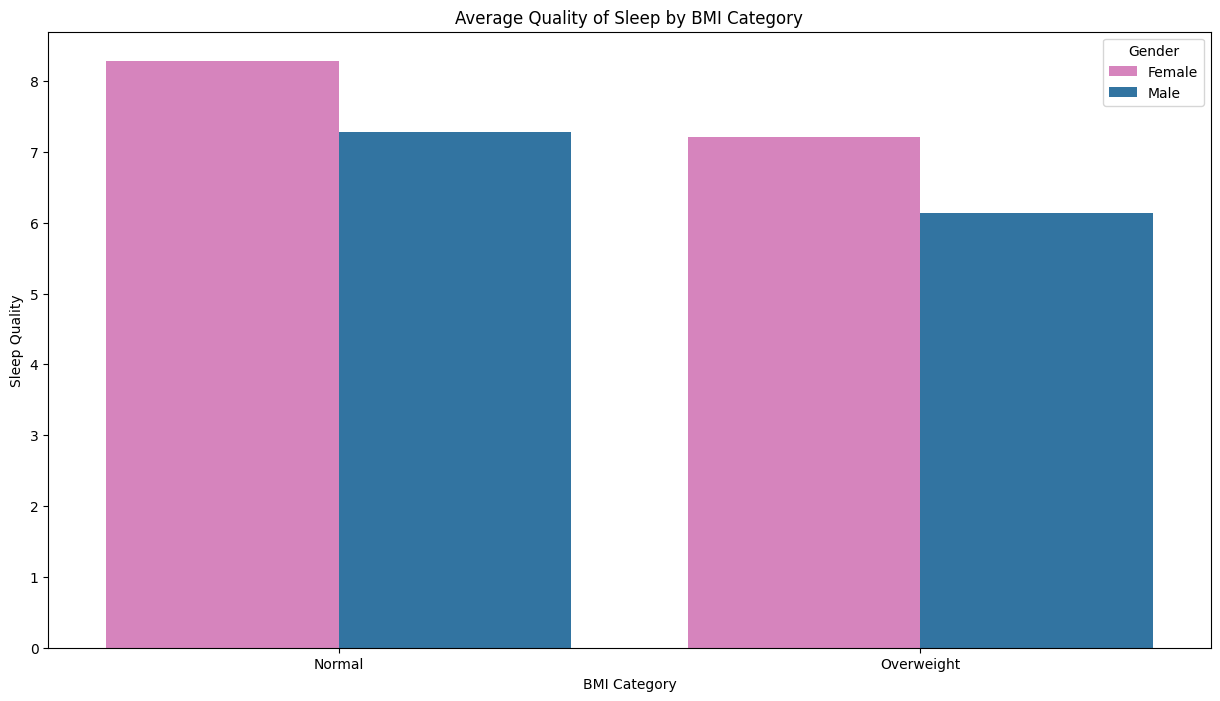

In [14]:
# perform groupby 
df_test = df.groupby(['BMI Category', 'Gender']).agg(mean_sleep_quality=("Quality of Sleep", 'mean')) 
df_test = df_test.reset_index() 

plt.figure(figsize=(15,8))
# plot barplot 
chart = sns.barplot(x="BMI Category", 
		y="mean_sleep_quality", 
		hue="Gender", 
		data=df_test,
        palette=["C6", "C0"])

chart.set_title('Average Quality of Sleep by BMI Category')
chart.set_ylabel('Sleep Quality')

plt.show()

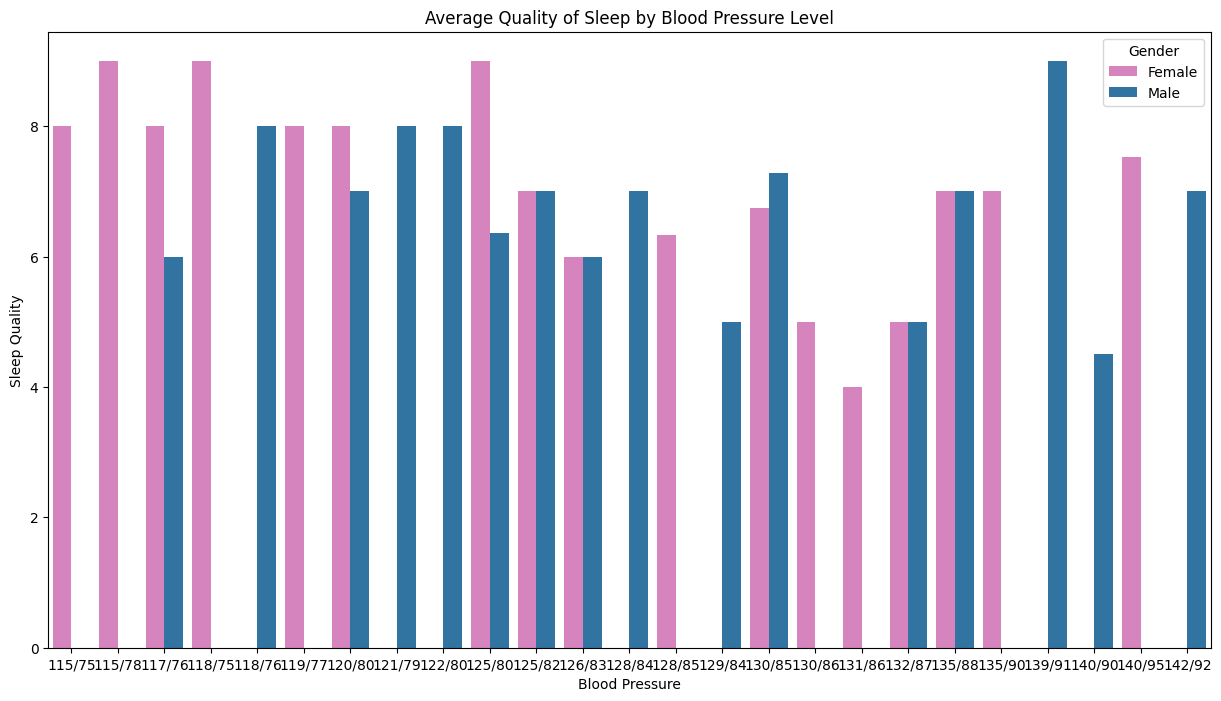

In [15]:
# perform groupby 
df_test = df.groupby(['Blood Pressure', 'Gender']).agg(mean_sleep_quality=("Quality of Sleep", 'mean')) 
df_test = df_test.reset_index() 

plt.figure(figsize=(15,8))
# plot barplot 
chart = sns.barplot(x="Blood Pressure", 
		y="mean_sleep_quality", 
		hue="Gender", 
		data=df_test,
        palette=["C6", "C0"])

chart.set_title('Average Quality of Sleep by Blood Pressure Level')
chart.set_ylabel('Sleep Quality')

plt.show()

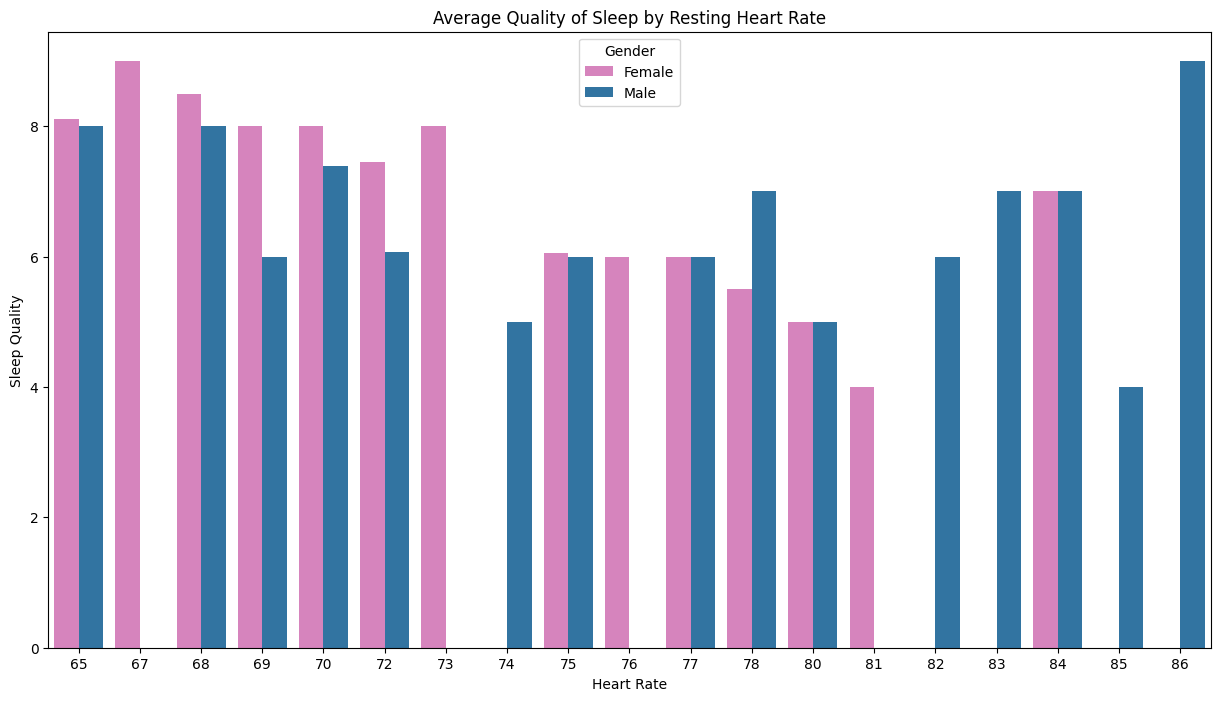

In [16]:
# perform groupby 
df_test = df.groupby(['Heart Rate', 'Gender']).agg(mean_sleep_quality=("Quality of Sleep", 'mean')) 
df_test = df_test.reset_index() 

plt.figure(figsize=(15,8))
# plot barplot 
chart = sns.barplot(x="Heart Rate", 
		y="mean_sleep_quality", 
		hue="Gender", 
		data=df_test,
        palette=["C6", "C0"])

chart.set_title('Average Quality of Sleep by Resting Heart Rate')
chart.set_ylabel('Sleep Quality')

plt.show()

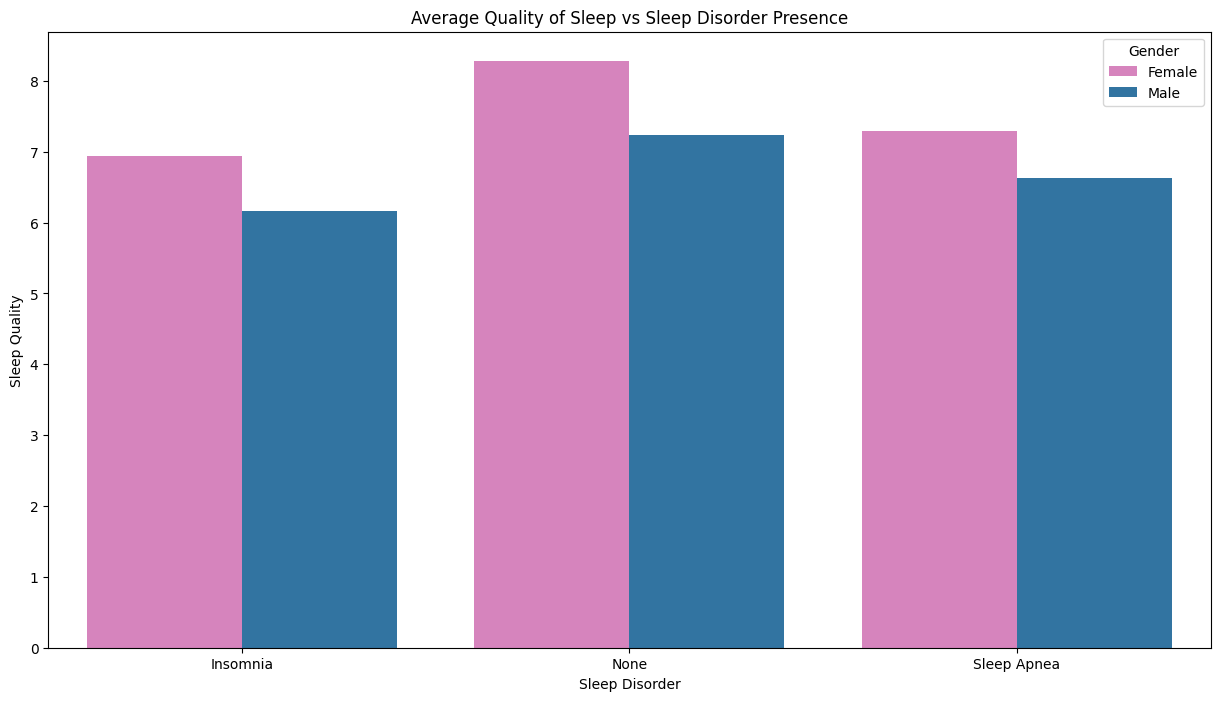

In [17]:
# perform groupby 
df_test = df.groupby(['Sleep Disorder', 'Gender']).agg(mean_sleep_quality=("Quality of Sleep", 'mean')) 
df_test = df_test.reset_index() 

plt.figure(figsize=(15,8))
# plot barplot 
chart = sns.barplot(x="Sleep Disorder", 
		y="mean_sleep_quality", 
		hue="Gender", 
		data=df_test,
        palette=["C6", "C0"])

chart.set_title('Average Quality of Sleep vs Sleep Disorder Presence')
chart.set_ylabel('Sleep Quality')

plt.show()

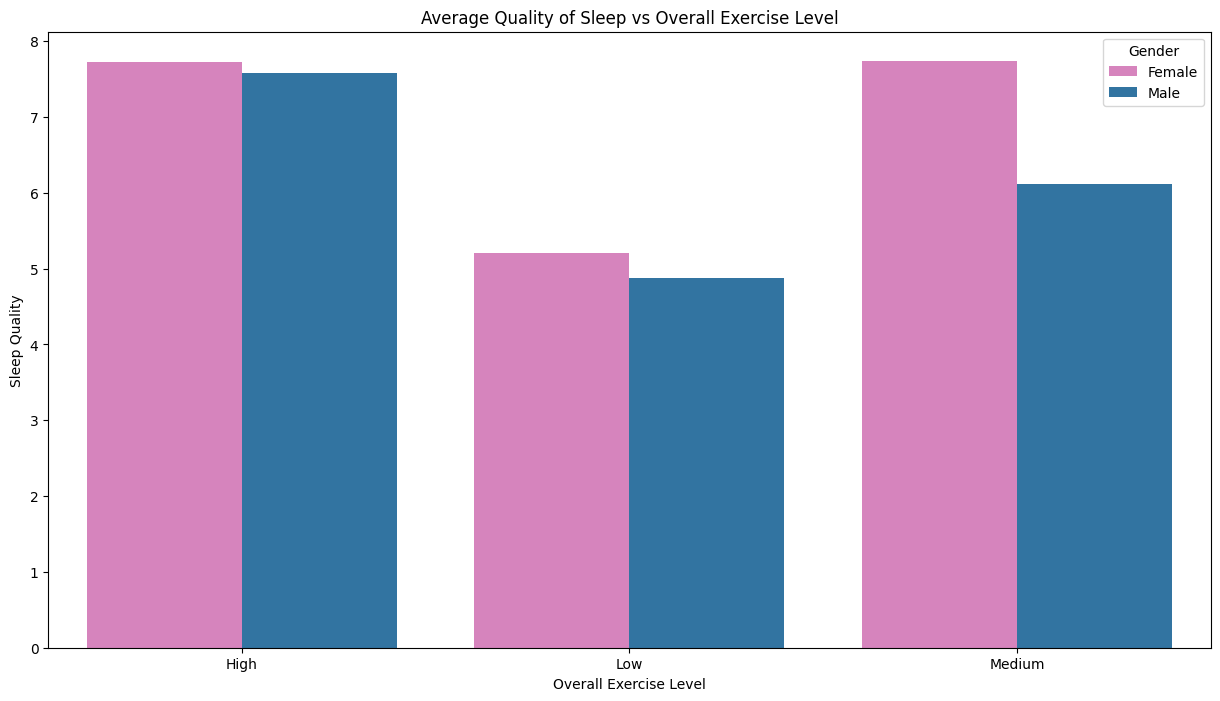

In [18]:
# perform groupby 
df_test = df.groupby(['Overall Exercise Level', 'Gender']).agg(mean_sleep_quality=("Quality of Sleep", 'mean')) 
df_test = df_test.reset_index() 

plt.figure(figsize=(15,8))
# plot barplot 
chart = sns.barplot(x="Overall Exercise Level", 
		y="mean_sleep_quality", 
		hue="Gender", 
		data=df_test,
        palette=["C6", "C0"])

chart.set_title('Average Quality of Sleep vs Overall Exercise Level')
chart.set_ylabel('Sleep Quality')

plt.show()

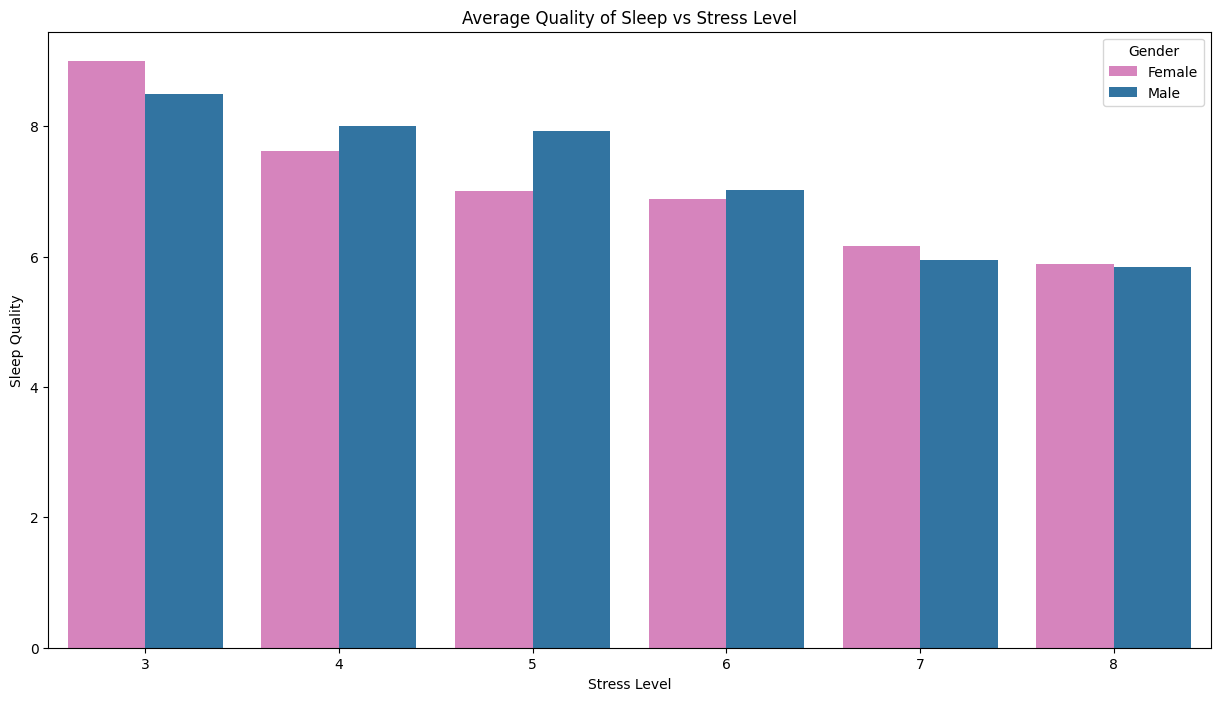

In [19]:
# perform groupby 
df_test = df.groupby(['Stress Level', 'Gender']).agg(mean_sleep_quality=("Quality of Sleep", 'mean')) 
df_test = df_test.reset_index() 

plt.figure(figsize=(15,8))
# plot barplot 
chart = sns.barplot(x="Stress Level", 
		y="mean_sleep_quality", 
		hue="Gender", 
		data=df_test,
        palette=["C6", "C0"])

chart.set_title('Average Quality of Sleep vs Stress Level')
chart.set_ylabel('Sleep Quality')

plt.show()

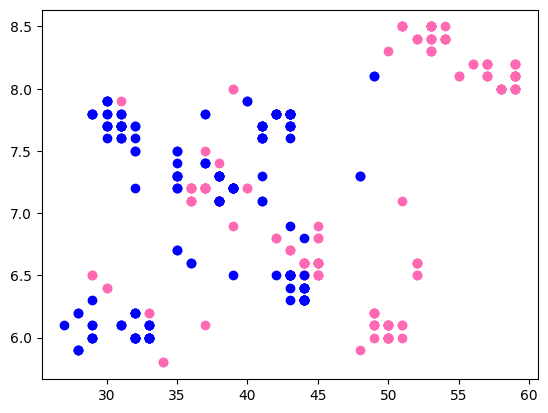

In [31]:
#scatterplot with labels
#gender = df['male']
#plt.scatter(height, weight, c=gender) #scatterplot with gender color coded
#plt.xlabel('height (cm)')
#plt.ylabel('weight (kg)')

#plt.plot(x_values, y_values, c='red')
#plt.show()

df_male = df[df.Gender == 'Male']
df_female = df[df.Gender == 'Female']

#plt.scatter(df['Age'], df['Sleep Duration'], c=df['Gender'])
plt.scatter(df_female['Age'], df_female['Sleep Duration'], color = 'hotpink')
plt.scatter(df_male['Age'], df_male['Sleep Duration'], color = 'blue')
plt.show()

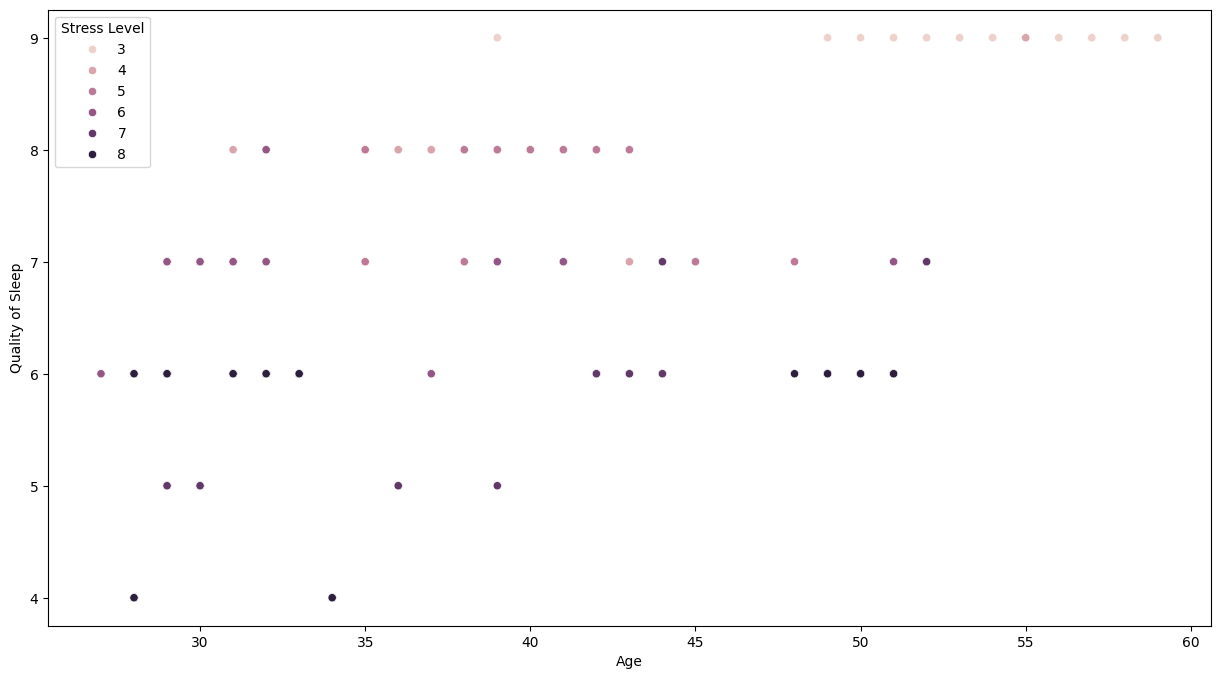

In [85]:
plt.figure(figsize=(15,8))
# plot scatterplot 
sns.scatterplot(x="Age", 
		y="Quality of Sleep", 
		hue="Stress Level", 
		data=df)

plt.show()